In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(4402, 2)

In [3]:
df.head()

,Time,domain
0,2021-09-30 11:08:57,localhost:8888
1,2021-09-30 11:08:50,localhost:8888
2,2021-09-30 11:08:48,localhost:8888
3,2021-09-30 11:08:45,localhost:8888
4,2021-09-30 11:05:54,localhost:8888


In [4]:
df.tail()

,Time,domain
4397,2021-07-08 06:35:29,www.pp.dupont.com
4398,2021-07-08 06:34:49,www.pp.dupont.com
4399,2021-07-08 06:33:25,www.pp.dupont.com
4400,2021-07-08 06:30:02,www.pp.dupont.com
4401,2021-07-08 06:28:48,www.pp.greatstuff.dupont.com


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

www.google.com                        739
www.youtube.com                       267
mail.google.com                       247
www.amazon.com                        229
blackboard.umbc.edu                   160
www.linkedin.com                      149
www.instagram.com                     141
webauth.umbc.edu                      122
github.com                            120
stackoverflow.com                     115
photos.google.com                     110
localhost:8888                         91
umbc.coursearc.com                     71
my3.my.umbc.edu                        68
hangouts.google.com                    67
localhost:8889                         49
www.peacocktv.com                      38
lucid.app                              34
accounts.google.com                    33
my.umbc.edu                            33
www.united.com                         32
myretrievercare.umbc.edu               29
umbc-csm.symplicity.com                23
www.googleadservices.com          

<AxesSubplot:>

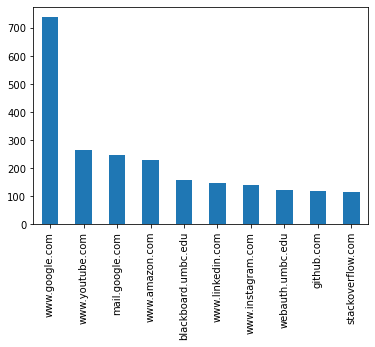

In [10]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [11]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      31
1      20
2       4
5       1
6      12
7      27
8     193
9     129
10    701
11    351
12    236
13    239
14    620
15    169
16    210
17    163
18    252
19    275
20    145
21    128
22    294
23    202
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

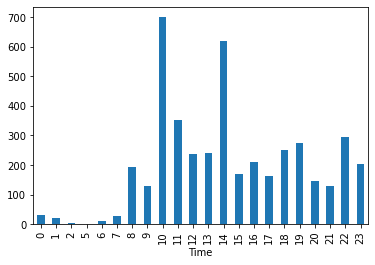

In [12]:
hourly_counts.plot.bar()

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-09-30 11:08:57,localhost:8888,Thursday,3
1,2021-09-30 11:08:50,localhost:8888,Thursday,3
2,2021-09-30 11:08:48,localhost:8888,Thursday,3
3,2021-09-30 11:08:45,localhost:8888,Thursday,3
4,2021-09-30 11:05:54,localhost:8888,Thursday,3


In [14]:
df['Day'].value_counts()

Sunday       740
Thursday     711
Saturday     706
Wednesday    681
Tuesday      625
Monday       532
Friday       407
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    532
1    625
2    681
3    711
4    407
5    706
6    740
Name: DayIndex, dtype: int64

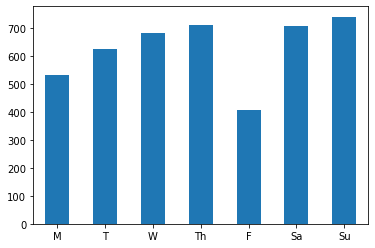

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [17]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-09-30 11:08:57,localhost:8888,Thursday,3,False
1,2021-09-30 11:08:50,localhost:8888,Thursday,3,False
2,2021-09-30 11:08:48,localhost:8888,Thursday,3,False
3,2021-09-30 11:08:45,localhost:8888,Thursday,3,False
4,2021-09-30 11:05:54,localhost:8888,Thursday,3,False


In [18]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [19]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
521,2021-09-26 23:52:19,github.com,Sunday,6,True
522,2021-09-26 23:39:43,localhost:8888,Sunday,6,True
523,2021-09-26 23:39:42,NaN,Sunday,6,True
524,2021-09-26 23:34:21,github.com,Sunday,6,True
525,2021-09-26 23:31:34,developer.blackboard.com,Sunday,6,True


In [20]:
weekday['domain'].value_counts()[:5]

www.google.com         536
www.amazon.com         223
mail.google.com        212
www.youtube.com        191
blackboard.umbc.edu    109
Name: domain, dtype: int64

In [21]:
weekend['domain'].value_counts()[:5]

www.google.com       203
www.instagram.com    141
photos.google.com    110
www.youtube.com       76
www.linkedin.com      71
Name: domain, dtype: int64

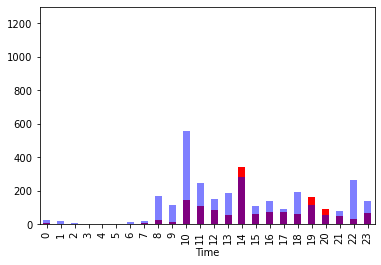

In [22]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

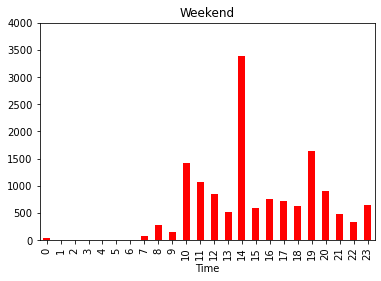

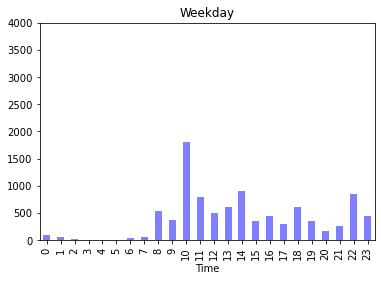

In [27]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 4000]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [28]:
df['domain'].value_counts()[:50]

www.google.com                        739
www.youtube.com                       267
mail.google.com                       247
www.amazon.com                        229
blackboard.umbc.edu                   160
www.linkedin.com                      149
www.instagram.com                     141
webauth.umbc.edu                      122
github.com                            120
stackoverflow.com                     115
photos.google.com                     110
localhost:8888                         91
umbc.coursearc.com                     71
my3.my.umbc.edu                        68
hangouts.google.com                    67
localhost:8889                         49
www.peacocktv.com                      38
lucid.app                              34
accounts.google.com                    33
my.umbc.edu                            33
www.united.com                         32
myretrievercare.umbc.edu               29
umbc-csm.symplicity.com                23
www.googleadservices.com          

In [29]:
df['domain'] = df['domain'].astype(str)

In [30]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

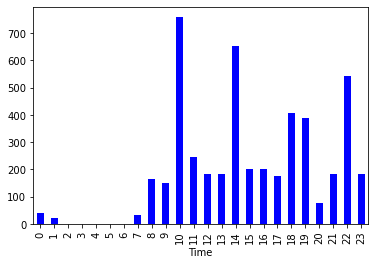

In [32]:
_= show_domain_stats('google', 'blue')

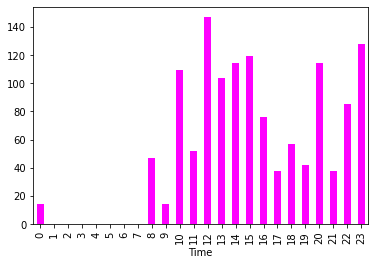

In [33]:
_ = show_domain_stats('youtube', 'magenta')


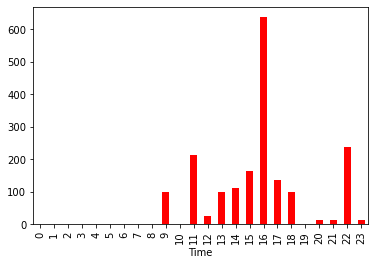

In [34]:
_ = show_domain_stats('linkedin', 'red')


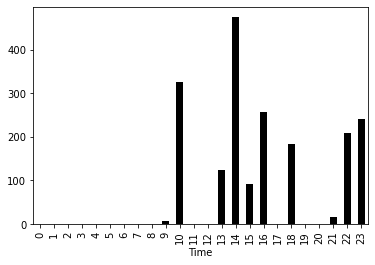

In [35]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

### Answers
1. Personal Computer
2. No
3. Mostly googling and youtube
4. Total records are very low. Maybe he bought the computer recently/ He don't use computer often but whenever he uses computer, productive hours are mostly during the day.

### What do you think about this assignment? ( 3 sentences at most! ) 

### Answer:
##### Major thing - one can identify flaws and can work on them. 
For example, if the browsing history shows more social media sites he/she wasting lot of time or maybe addicted to entertainment content which results loss of productive time.

__NOTE__: If you give your permission for another student to analyze your `history_cleaned.csv` please commit it with this hw file.

(Your name will stay confidencial)